## Patch extraction

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Running in Colab
X = np.load('/content/drive/MyDrive/Colab Notebooks/data/X.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/data/Y.npy')

In [5]:
X.shape

(5547, 50, 50, 3)

In [6]:
y.shape

(5547,)

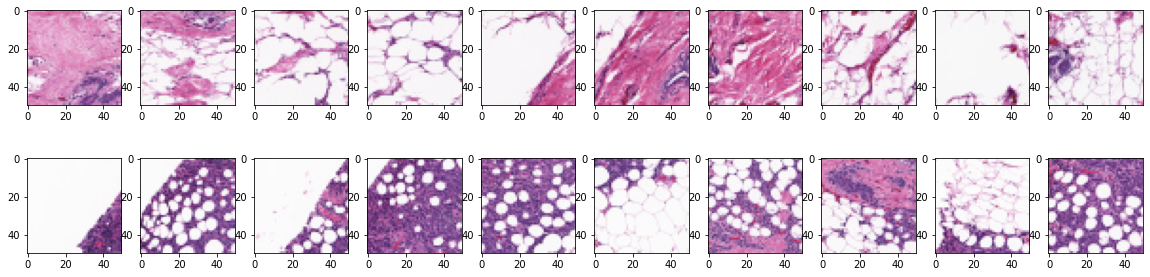

In [7]:
neg = X[y==0]
pos = X[y==1]

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(neg[i])
    plt.subplot(2, n, n + i + 1)
    plt.imshow(pos[i])

Test with a fake image

In [8]:
from sklearn.datasets import load_sample_images
from sklearn.feature_extraction import image
# Use the array data from the second image in this dataset:
X = load_sample_images().images[1]
print('Image shape: {}'.format(X.shape))

Image shape: (427, 640, 3)


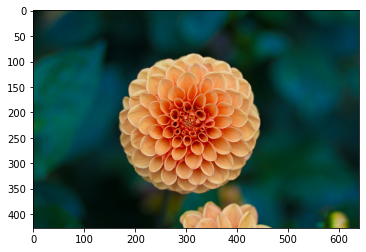

In [9]:
plt.imshow(X)

In [10]:
X.shape

(427, 640, 3)

In [11]:
# Get image dimensions
height = X.shape[0]
width = X.shape[1]

In [12]:
# Pad image so its dimensions are multiples of 50. Assumes an RGB image
pad_height = int(np.ceil(height/50))*50
pad_width = int(np.ceil(width/50))*50
pad = np.zeros((pad_height,pad_width,3), dtype=np.uint8)
pad[:height, :width, :] = X

In [13]:
pad.shape

(450, 650, 3)

In [14]:
# Create an array of 50 x 50 images
img_array = np.zeros((int(pad_height/50) * int(pad_width/50), 50, 50, 3), dtype=np.uint8)

for h in range(int(pad_height/50)):
    for w in range(int(pad_width/50)):
        img_array[h*int(pad_width/50)+w,:,:,:] = pad[h*50:(h+1)*50, w*50:(w+1)*50, :]

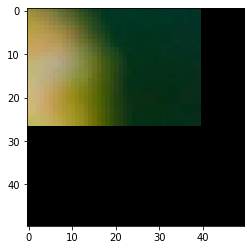

In [15]:
plt.imshow(img_array[116]);